In [1]:
import numpy as np
import pandas as pd 
import requests
import xlsxwriter
import math
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame 
%matplotlib inline
import pandas_ta as pta
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [3]:
load_dotenv()
api_key = os.getenv('ALPACA_API_KEY')
api_secret = os.getenv('ALPACA_SECRET_KEY')


yesterday_date = date.today() - timedelta(1)

print(yesterday_date)

2022-10-02


In [4]:
base_url = 'https://paper-api.alpaca.markets'

api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

account = api.get_account()


# api.get_portfolio_history(date_start=None, date_end=None, period=None, timeframe=None, extended_hours=None)


# Create the Alpaca API object
# YOUR CODE HERE!
ETH_price = api.get_crypto_bars('ETHUSD',  TimeFrame.Day, "2010-06-08", yesterday_date)
ETH_df = ETH_price.df

ETH_df.tail()

,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2022-10-01 05:00:00+00:00,ERSX,1326.36,1331.59,1302.42,1305.62,90.988815,28,1311.749908
2022-10-01 05:00:00+00:00,FTXU,1328.90,1333.30,1302.60,1312.90,18847.616000,21462,1315.762142
2022-10-02 05:00:00+00:00,CBSE,1312.84,1318.00,1262.45,1288.05,203816.306269,374755,1292.300836
2022-10-02 05:00:00+00:00,ERSX,1312.33,1313.33,1263.22,1289.23,582.292341,110,1284.696319
2022-10-02 05:00:00+00:00,FTXU,1313.00,1317.70,1263.40,1288.40,20378.642000,25734,1293.791753


In [5]:
ETH_df = ETH_df.drop(columns=["open","high","low","volume","trade_count","vwap"])


In [6]:
ETH_df = ETH_df[ETH_df['exchange'].str.contains("ERSX|FTXU")==False]


ETH_df.head()

,exchange,close
timestamp,,
2016-05-17 05:00:00+00:00,CBSE,14.00
2016-05-18 05:00:00+00:00,CBSE,13.18
2016-05-19 05:00:00+00:00,CBSE,14.82
2016-05-20 05:00:00+00:00,CBSE,14.17
2016-05-23 05:00:00+00:00,CBSE,13.74


In [7]:
ETH_df["Actual Returns"] = ETH_df["close"].pct_change()

In [8]:
ETH_df = ETH_df.dropna()

In [9]:
ETH_df

,exchange,close,Actual Returns
timestamp,,,
2016-05-18 05:00:00+00:00,CBSE,13.18,-0.058571
2016-05-19 05:00:00+00:00,CBSE,14.82,0.124431
2016-05-20 05:00:00+00:00,CBSE,14.17,-0.043860
2016-05-23 05:00:00+00:00,CBSE,13.74,-0.030346
2016-05-24 05:00:00+00:00,CBSE,12.94,-0.058224
...,...,...,...
2022-09-28 05:00:00+00:00,CBSE,1341.36,0.044787
2022-09-29 05:00:00+00:00,CBSE,1328.64,-0.009483
2022-09-30 05:00:00+00:00,CBSE,1329.00,0.000271


In [10]:
ETH_df["RSI EMA"] = pta.rsi(ETH_df['close'], length = 30)
ETH_df["RSI Drift"] = pta.rsi(ETH_df['close'], length = 30, drift = 10)

In [11]:
ETH_df = ETH_df.dropna()

In [12]:
ETH_df    

,exchange,close,Actual Returns,RSI EMA,RSI Drift
timestamp,,,,,
2016-06-28 05:00:00+00:00,CBSE,12.23,-0.124553,45.779760,45.191366
2016-06-29 05:00:00+00:00,CBSE,12.70,0.038430,46.987372,45.886696
2016-06-30 05:00:00+00:00,CBSE,12.32,-0.029921,46.128081,46.348415
2016-07-01 05:00:00+00:00,CBSE,12.14,-0.014610,45.718384,44.625139
2016-07-02 05:00:00+00:00,CBSE,12.09,-0.004119,45.601998,43.459800
...,...,...,...,...,...
2022-09-28 05:00:00+00:00,CBSE,1341.36,0.044787,44.490839,29.870477
2022-09-29 05:00:00+00:00,CBSE,1328.64,-0.009483,44.153952,29.724385
2022-09-30 05:00:00+00:00,CBSE,1329.00,0.000271,44.166330,29.674832


In [13]:
ETH_df["Signal"] = 0.0


ETH_df.loc[(ETH_df["Actual Returns"] >= 0), 'Signal'] = 1
ETH_df.loc[(ETH_df["Actual Returns"] < 0), 'Signal'] = -1



C:\Users\eduar\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eduar\anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
ETH_df

,exchange,close,Actual Returns,RSI EMA,RSI Drift,Signal
timestamp,,,,,,
2016-06-28 05:00:00+00:00,CBSE,12.23,-0.124553,45.779760,45.191366,-1.0
2016-06-29 05:00:00+00:00,CBSE,12.70,0.038430,46.987372,45.886696,1.0
2016-06-30 05:00:00+00:00,CBSE,12.32,-0.029921,46.128081,46.348415,-1.0
2016-07-01 05:00:00+00:00,CBSE,12.14,-0.014610,45.718384,44.625139,-1.0
2016-07-02 05:00:00+00:00,CBSE,12.09,-0.004119,45.601998,43.459800,-1.0
...,...,...,...,...,...,...
2022-09-28 05:00:00+00:00,CBSE,1341.36,0.044787,44.490839,29.870477,1.0
2022-09-29 05:00:00+00:00,CBSE,1328.64,-0.009483,44.153952,29.724385,-1.0
2022-09-30 05:00:00+00:00,CBSE,1329.00,0.000271,44.166330,29.674832,1.0


In [15]:
ETH_df['Strategy Returns'] = ETH_df['Actual Returns'] * ETH_df['Signal'].shift()

C:\Users\eduar\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
ETH_df

,exchange,close,Actual Returns,RSI EMA,RSI Drift,Signal,Strategy Returns
timestamp,,,,,,,
2016-06-28 05:00:00+00:00,CBSE,12.23,-0.124553,45.779760,45.191366,-1.0,NaN
2016-06-29 05:00:00+00:00,CBSE,12.70,0.038430,46.987372,45.886696,1.0,-0.038430
2016-06-30 05:00:00+00:00,CBSE,12.32,-0.029921,46.128081,46.348415,-1.0,-0.029921
2016-07-01 05:00:00+00:00,CBSE,12.14,-0.014610,45.718384,44.625139,-1.0,0.014610
2016-07-02 05:00:00+00:00,CBSE,12.09,-0.004119,45.601998,43.459800,-1.0,0.004119
...,...,...,...,...,...,...,...
2022-09-28 05:00:00+00:00,CBSE,1341.36,0.044787,44.490839,29.870477,1.0,-0.044787
2022-09-29 05:00:00+00:00,CBSE,1328.64,-0.009483,44.153952,29.724385,-1.0,-0.009483
2022-09-30 05:00:00+00:00,CBSE,1329.00,0.000271,44.166330,29.674832,1.0,-0.000271


<AxesSubplot:xlabel='timestamp'>

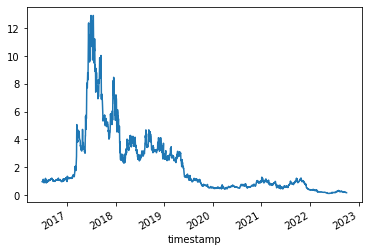

In [17]:
(1 + ETH_df['Strategy Returns']).cumprod().plot()

In [18]:
X = ETH_df[["RSI EMA","RSI Drift" ]].shift().dropna()

In [19]:
y = ETH_df['Signal']

In [20]:
training_begin = X.index.min()
print(training_begin)

2016-06-29 05:00:00+00:00


In [21]:
training_end = X.index.min() + DateOffset(months=24)
print(training_end)

2018-06-29 05:00:00+00:00


In [22]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]


In [23]:
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

In [24]:
scaler = StandardScaler()


X_scaler = scaler.fit(X_train)


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
from sklearn import svm

In [26]:
svm_model =svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]


array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [27]:
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.51      0.65      0.57       766
         1.0       0.54      0.39      0.45       790

    accuracy                           0.52      1556
   macro avg       0.52      0.52      0.51      1556
weighted avg       0.52      0.52      0.51      1556



In [28]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = ETH_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df["Actual Returns"] * svm_pred

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
timestamp,,,
2018-06-30 05:00:00+00:00,-1.0,0.034952,-0.034952
2018-07-01 05:00:00+00:00,-1.0,0.003646,-0.003646
2018-07-02 05:00:00+00:00,-1.0,0.068338,-0.068338
2018-07-03 05:00:00+00:00,-1.0,-0.051153,0.051153
2018-07-04 05:00:00+00:00,-1.0,0.020301,-0.020301


,Predicted,Actual Returns,Strategy Returns
timestamp,,,
2022-09-28 05:00:00+00:00,-1.0,0.044787,-0.044787
2022-09-29 05:00:00+00:00,-1.0,-0.009483,0.009483
2022-09-30 05:00:00+00:00,-1.0,0.000271,-0.000271
2022-10-01 05:00:00+00:00,-1.0,-0.012197,0.012197
2022-10-02 05:00:00+00:00,-1.0,-0.018845,0.018845


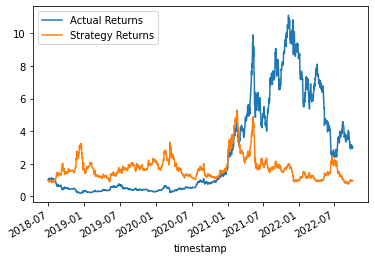

In [29]:
# Plot the actual returns versus the strategy returns
SVM_plot = (1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

# Save the plot as an PNG
plt.savefig("SVM_plot.png") 

In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
bc_model = BaggingClassifier()
 
# Fit the model to the data using the training data
bc_model = bc_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
bc_pred = bc_model.predict(X_test_scaled)

# Review the model's predicted values
bc_pred[:10]

array([-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.])

In [49]:
bc_testing_report = classification_report(y_test, bc_pred)

# Print the classification report
print(bc_testing_report)

              precision    recall  f1-score   support

        -1.0       0.51      0.57      0.54       766
         1.0       0.53      0.47      0.50       790

    accuracy                           0.52      1556
   macro avg       0.52      0.52      0.52      1556
weighted avg       0.52      0.52      0.52      1556



In [33]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_bc_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_bc_df['Predicted'] = bc_pred

# Add the actual returns to the DataFrame
predictions_bc_df['Actual Returns'] = ETH_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_bc_df['Strategy Returns'] = predictions_bc_df["Actual Returns"] * bc_pred

# Review the DataFrame
display(predictions_bc_df.head())
display(predictions_bc_df.tail())

,Predicted,Actual Returns,Strategy Returns
timestamp,,,
2018-06-30 05:00:00+00:00,-1.0,0.034952,-0.034952
2018-07-01 05:00:00+00:00,-1.0,0.003646,-0.003646
2018-07-02 05:00:00+00:00,-1.0,0.068338,-0.068338
2018-07-03 05:00:00+00:00,1.0,-0.051153,-0.051153
2018-07-04 05:00:00+00:00,-1.0,0.020301,-0.020301


,Predicted,Actual Returns,Strategy Returns
timestamp,,,
2022-09-28 05:00:00+00:00,1.0,0.044787,0.044787
2022-09-29 05:00:00+00:00,-1.0,-0.009483,0.009483
2022-09-30 05:00:00+00:00,-1.0,0.000271,-0.000271
2022-10-01 05:00:00+00:00,-1.0,-0.012197,0.012197
2022-10-02 05:00:00+00:00,-1.0,-0.018845,0.018845


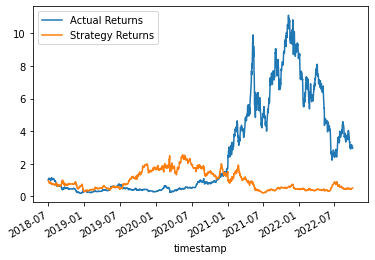

In [34]:
# Plot the actual returns versus the strategy returns
BC_plot = (1 + predictions_bc_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

# Save the plot as an PNG
plt.savefig("BC_plot.png") 

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
ABC_model = AdaBoostClassifier()
 
# Fit the model to the data using the training data
ABC_model = ABC_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
ABC_pred = ABC_model.predict(X_test_scaled)

# Review the model's predicted values
ABC_pred[:10]


array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [50]:
ABC_testing_report = classification_report(y_test, ABC_pred)

# Print the classification report
print(ABC_testing_report)

              precision    recall  f1-score   support

        -1.0       0.52      0.55      0.53       766
         1.0       0.54      0.51      0.52       790

    accuracy                           0.53      1556
   macro avg       0.53      0.53      0.53      1556
weighted avg       0.53      0.53      0.53      1556



In [38]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_abc_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_abc_df['Predicted'] = ABC_pred

# Add the actual returns to the DataFrame
predictions_abc_df['Actual Returns'] = ETH_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_abc_df['Strategy Returns'] = predictions_abc_df["Actual Returns"] * ABC_pred

# Review the DataFrame
display(predictions_abc_df.head())
display(predictions_abc_df.tail())

,Predicted,Actual Returns,Strategy Returns
timestamp,,,
2018-06-30 05:00:00+00:00,-1.0,0.034952,-0.034952
2018-07-01 05:00:00+00:00,-1.0,0.003646,-0.003646
2018-07-02 05:00:00+00:00,-1.0,0.068338,-0.068338
2018-07-03 05:00:00+00:00,-1.0,-0.051153,0.051153
2018-07-04 05:00:00+00:00,-1.0,0.020301,-0.020301


,Predicted,Actual Returns,Strategy Returns
timestamp,,,
2022-09-28 05:00:00+00:00,1.0,0.044787,0.044787
2022-09-29 05:00:00+00:00,-1.0,-0.009483,0.009483
2022-09-30 05:00:00+00:00,-1.0,0.000271,-0.000271
2022-10-01 05:00:00+00:00,-1.0,-0.012197,0.012197
2022-10-02 05:00:00+00:00,1.0,-0.018845,-0.018845


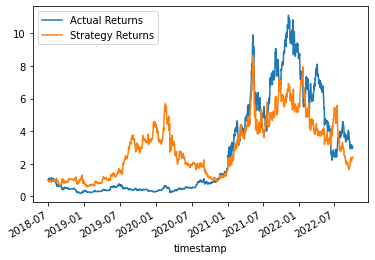

In [39]:
# Plot the actual returns versus the strategy returns
ABC_plot = (1 + predictions_abc_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

# Save the plot as an PNG
plt.savefig("ABC_plot.png") 

In [51]:
# Comparing all clasification reports

print(svm_testing_report)
print(bc_testing_report)
print(ABC_testing_report)

              precision    recall  f1-score   support

        -1.0       0.51      0.65      0.57       766
         1.0       0.54      0.39      0.45       790

    accuracy                           0.52      1556
   macro avg       0.52      0.52      0.51      1556
weighted avg       0.52      0.52      0.51      1556

              precision    recall  f1-score   support

        -1.0       0.51      0.57      0.54       766
         1.0       0.53      0.47      0.50       790

    accuracy                           0.52      1556
   macro avg       0.52      0.52      0.52      1556
weighted avg       0.52      0.52      0.52      1556

              precision    recall  f1-score   support

        -1.0       0.52      0.55      0.53       766
         1.0       0.54      0.51      0.52       790

    accuracy                           0.53      1556
   macro avg       0.53      0.53      0.53      1556
weighted avg       0.53      0.53      0.53      1556

